## Retail Analysis and Sales Forecasting with Walmart Data

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

### Exploratory Data Analysis

In [2]:
#load the dataset
df_wm=pd.read_csv('Walmart_Store_sales.csv')

In [3]:
#View head
df_wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#view shape
df_wm.shape

(6435, 8)

In [5]:
#Statistical description of dataset
df_wm.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df_wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
#grouping the weekly sales by store
sales_report=df_wm['Weekly_Sales'].groupby(df_wm['Store'])
total_sales=sales_report.sum()
print(max(total_sales))

301397792.46000004


In [8]:
#Store with most sales value
total_sales.nlargest(1)

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

In [9]:
#Store with most sales
print(total_sales.idxmax())

20


In [10]:
#Store with highest weekly sales
max_weekly=df_wm[df_wm['Weekly_Sales']==max(df_wm['Weekly_Sales'])]
print(max_weekly['Store'].values)

[14]


In [11]:
#Maximum Standard Deviation in the sales of a store
sales_sd=sales_report.std()
sales_sd.nlargest(1)

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [12]:
#mean standard deviation
sales_report.std().mean()

141585.8646635992

In [13]:
#Coefficient of mean to standard deviation
csd=df_wm['Weekly_Sales'].groupby(df_wm['Store']).apply(lambda x:np.std(x)/np.mean(x))

In [14]:
#highest coefficient of standard deviation
csd.nlargest(1)

Store
35    0.228877
Name: Weekly_Sales, dtype: float64

### Past Sales Trend Analysis

In [15]:
#conversion of date from object to datetime format
i=0
for x in df_wm['Date']:
    d = dt.strptime(x, '%d-%m-%Y')
    df_wm['Date'][i]=d.strftime('%Y-%m-%d')
    i=i+1

df_wm.head()

C:\Users\PSingh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
df_wm['Date']=df_wm['Date'].apply(lambda x:np.datetime64(x))

In [17]:
df_wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [18]:
#Separating Q1,Q2 and Q3 data for 2012
Q1_2012=df_wm[(df_wm['Date']>='2012-01-01')&(df_wm['Date']<='2012-03-31')]
sr_q1=Q1_2012['Weekly_Sales'].groupby(Q1_2012['Store'])
sales_q1=sr_q1.sum()
Q2_2012=df_wm[(df_wm['Date']>='2012-04-01')&(df_wm['Date']<='2012-06-30')]
sr_q2=Q2_2012['Weekly_Sales'].groupby(Q2_2012['Store'])
sales_q2=sr_q2.sum()
Q3_2012=df_wm[(df_wm['Date']>='2012-07-01')&(df_wm['Date']<='2012-09-30')]
sr_q3=Q3_2012['Weekly_Sales'].groupby(Q3_2012['Store'])
sales_q3=sr_q3.sum()

In [19]:
#sales growth in Q3-2012 wrt Q2-2012
q3_grw=((sales_q3-sales_q2)/sales_q2)*100

In [20]:
q3_grw.nlargest(5)

Store
7     13.330776
16     8.488378
35     4.466637
26     3.955478
39     2.478404
Name: Weekly_Sales, dtype: float64

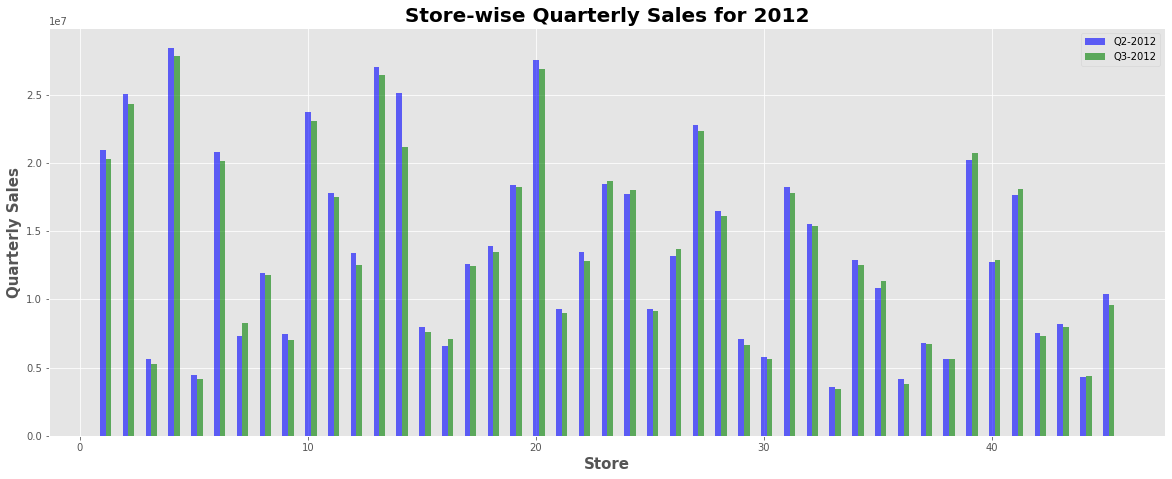

In [21]:
#plotting bar chart for weekly sales in Q2 and Q3-2012
plt.figure(figsize=(20,7.5))
style.use('ggplot')
x1=sales_q2.values
x2=sales_q3.values
ind=sales_q2.index
bw=0.25
plt.bar(ind,x1,color='b',alpha=0.6,width=0.25,align='center',label='Q2-2012')
plt.bar(ind+bw,x2,color='g',alpha=0.6,width=bw,align='center',label='Q3-2012')
plt.xlabel('Store',fontweight='bold',fontsize=15)
plt.ylabel('Quarterly Sales',fontweight='bold',fontsize=15)
plt.title('Store-wise Quarterly Sales for 2012',fontweight='bold',fontsize=20)
plt.legend(loc='best')
plt.show()

In [22]:
#Growth in sales in Q3-2012 wrt total sales at the end of Q2-2012
gr_q3_2012=(sales_q3/(sales_q1+sales_q2))*100
gr_q3_2012.nlargest(5)

Store
35    55.282097
16    54.929756
7     54.780282
41    54.268155
26    54.211803
Name: Weekly_Sales, dtype: float64

In [23]:
#splitting the data of holday and non-holiday sales
holidays=(['2010-02-12','2011-02-11','2012-02-10','2013-02-08',
         '2010-09-10', '2011-09-09','2012-09-07', '2013-09-06',
         '2010-11-26', '2011-11-25','2012-11-23', '2013-11-29',
         '2010-12-31', '2011-12-30','2012-12-28', '2013-12-27'])
data_non_holiday=df_wm[~df_wm['Date'].isin(holidays)]
data_holiday=df_wm[df_wm['Date'].isin(holidays)]

In [24]:
data_non_holiday.shape,data_holiday.shape

((5985, 8), (450, 8))

In [25]:
mean_nh_sales=data_non_holiday['Weekly_Sales'].mean()
mean_nh_sales

1041256.3802088564

In [26]:
#Holidays on which sales were more than average non-holiday sales
exc_sales=data_holiday[data_holiday['Weekly_Sales']>mean_nh_sales]
exc_sales['Date'].value_counts()

2011-11-25    31
2010-11-26    30
2012-02-10    22
2012-09-07    22
2010-02-12    21
2011-02-11    20
2011-09-09    20
2011-12-30    19
2010-09-10    19
2010-12-31    16
Name: Date, dtype: int64

In [27]:
exc_sales['Date'].drop_duplicates()

1     2010-02-12
31    2010-09-10
42    2010-11-26
47    2010-12-31
53    2011-02-11
83    2011-09-09
94    2011-11-25
99    2011-12-30
105   2012-02-10
135   2012-09-07
Name: Date, dtype: datetime64[ns]

In [28]:
#Creating Separate Columns for Month and Year

df_wm['Year']=pd.DatetimeIndex(df_wm['Date']).year
df_wm['Month']=pd.DatetimeIndex(df_wm['Date']).month
df_wm['Month']=df_wm['Date'].apply(lambda x: dt.strftime(x,'%b'))
df_wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar


In [29]:
#Dividing the Data Year Wise
df_2010=df_wm[df_wm['Year']==2010]
df_2011=df_wm[df_wm['Year']==2011]
df_2012=df_wm[df_wm['Year']==2012]
sales_2010=df_2010['Weekly_Sales'].sum()
sales_2011=df_2011['Weekly_Sales'].sum()
sales_2012=df_2012['Weekly_Sales'].sum()

In [30]:
#Month wise total sales every year
mnt_2010=df_2010['Weekly_Sales'].groupby(df_2010['Month'])
mnt_2011=df_2011['Weekly_Sales'].groupby(df_2011['Month'])
mnt_2012=df_2012['Weekly_Sales'].groupby(df_2012['Month'])
msales_2010=mnt_2010.sum()
msales_2011=mnt_2011.sum()
msales_2012=mnt_2012.sum()

In [31]:
#reordering month indices
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
msales_2010=msales_2010.reindex(months_in_order)
msales_2011=msales_2011.reindex(months_in_order)
msales_2012=msales_2012.reindex(months_in_order)

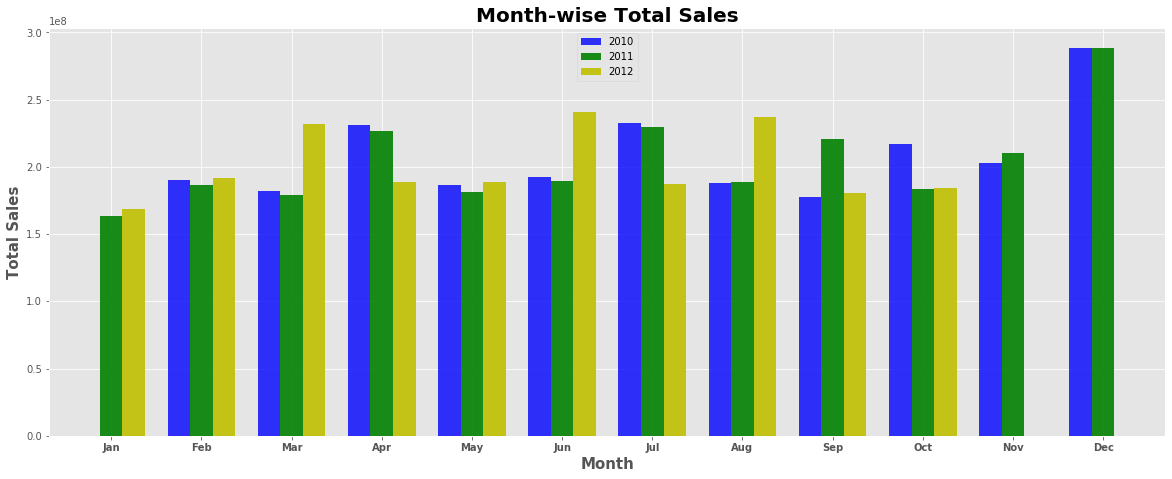

In [32]:
#plotting bar chart displaying total monthly sales for 3 years
plt.figure(figsize=(20,7.5))
style.use('ggplot')
x = np.arange(12)
bw=0.25
plt.xticks(x, months_in_order,fontweight='bold',fontsize=10)
plt.bar(x-bw,msales_2010.values,color='b',alpha=0.8,width=0.25,align='center',label='2010')
plt.bar(x,msales_2011.values,color='g',alpha=0.9,width=bw,align='center',label='2011')
plt.bar(x+bw,msales_2012.values,color='y',alpha=0.9,width=bw,align='center',label='2012')
plt.xlabel('Month',fontweight='bold',fontsize=15)
plt.ylabel('Total Sales',fontweight='bold',fontsize=15)
plt.title('Month-wise Total Sales',fontweight='bold',fontsize=20)
plt.legend(loc='best')
plt.show()

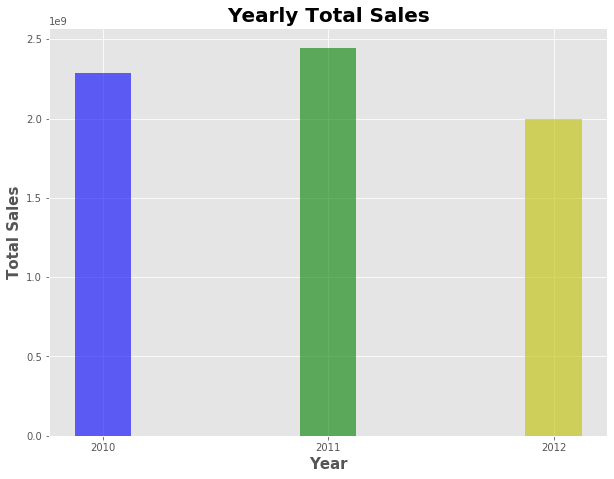

In [33]:
#plotting yearly sales
plt.figure(figsize=(10,7.5))
style.use('ggplot')
inds=['2010','2011','2012']
plt.bar(inds[0],sales_2010,color='b',alpha=0.6,width=0.25,align='center')
plt.bar(inds[1],sales_2011,color='g',alpha=0.6,width=bw,align='center')
plt.bar(inds[2],sales_2012,color='y',alpha=0.6,width=bw,align='center')
plt.xlabel('Year',fontweight='bold',fontsize=15)
plt.ylabel('Total Sales',fontweight='bold',fontsize=15)
plt.title('Yearly Total Sales',fontweight='bold',fontsize=20)
plt.show()

### Preperation of Data and Data Modelling

In [34]:
#Adding week no. as the new column
weekNo=df_wm.reset_index()
weekNo = [(x - df_wm['Date'][0]) for x in list(df_wm['Date'])]
df_wm['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]
df_wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,0.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,1.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,2.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,3.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,4.0


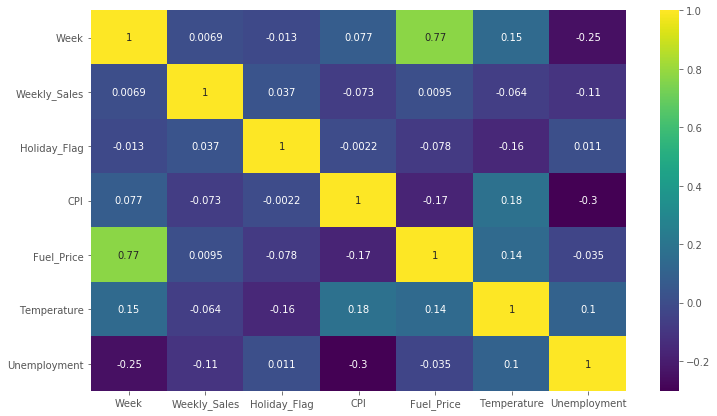

In [57]:
#Plotting the heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df_wm[['Week','Weekly_Sales','Holiday_Flag','CPI','Fuel_Price','Temperature','Unemployment']].corr(),
            annot=True,cmap='viridis')

In [36]:
#importing linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

In [37]:
#Selecting Predictor Features and Target Variables
x_feat=df_wm[['Week','Holiday_Flag','CPI','Fuel_Price','Temperature','Unemployment']]
y_targ=df_wm['Weekly_Sales']

In [38]:
#Splitting Data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_feat,y_targ)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4826, 6), (1609, 6), (4826,), (1609,))

In [39]:
#Fitting the training data into the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
#Determining the intercept
lr.intercept_

1609336.1075666083

In [41]:
#Determining the coefficients
lr.coef_

array([  -410.41277853,  59075.89212067,  -1452.17015972,  24359.20670148,
         -860.86249931, -39556.86153255])

In [42]:
#Predicting the outcome
y_pred=lr.predict(x_test)

In [43]:
#Evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse,mae)

322539317315.3259 474793.22297192045


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.03160168566629684

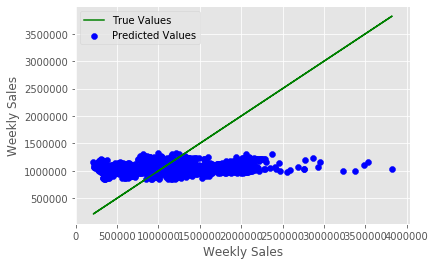

In [45]:
#Plotting predicted and true values of target variable
plt.plot(y_test,y_test,c='g',label='True Values')
plt.scatter(y_test,y_pred,c='b',label='Predicted Values')
plt.xlabel('Weekly Sales')
plt.ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

In [46]:
#Creating Dummy Features for stores
Store_Dummies = pd.get_dummies(df_wm.Store, prefix='Store').iloc[:,0:]
newdf = pd.concat([df_wm, Store_Dummies], axis=1)
newdf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,...,0,0,0,0,0,0,0,0,0,0


In [47]:
newdf.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Store_1',
       'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7',
       'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13',
       'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19',
       'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25',
       'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37',
       'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43',
       'Store_44', 'Store_45'],
      dtype='object')

In [48]:
#Splitting the training and test datasets
train_dat, test_dat = train_test_split(newdf, test_size=0.3,random_state=42)
x_train_new = train_dat.iloc[:,([3,4,5,6,7] + [10]) + list(range(11,newdf.shape[1]))]
y_train_new = train_dat.Weekly_Sales
                                                    
x_test_new= test_dat.iloc[:,([3,4,5,6,7] + [10]) + list(range(11,newdf.shape[1]))]
y_test_new=test_dat.Weekly_Sales

In [49]:
#Fitting the linear regression model with new training dataset
lm_new = LinearRegression(normalize=True)
lm_new.fit(x_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [50]:
#Predicting the Weekly Sales
y_pred_new = lm_new.predict(x_test_new)

### Final Performance Evaluation

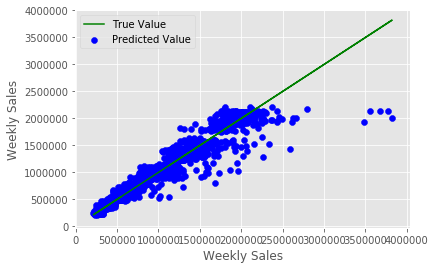

In [51]:
#Plotting the predicted and true values
plt.plot(y_test_new, y_test_new,c='g',label='True Value')
plt.scatter(y_test_new, y_pred_new,c='b',label='Predicted Value')
plt.xlabel('Weekly Sales')
plt.ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

In [52]:
#Evaluating the result
#mse and mae
mse=mean_squared_error(y_test_new,y_pred_new)
mae=mean_absolute_error(y_test_new,y_pred_new)
print(mse,mae)

26699670214.63538 94106.2619854569


In [53]:
#r2 score
print(r2_score(y_test_new,y_pred_new))

0.9164906274809529


In [54]:
#Training Score
lm_new.score(x_train_new,y_train_new)

0.9214470403808985

In [55]:
#Testing Score
lm_new.score(x_test_new,y_test_new)

0.916490627480953